# Getting a Job after Graduation


In [43]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint, EvalExponentialPdf, MakePoissonPmf, MakeMixture
from thinkbayes2 import MakeBinomialPmf
import thinkplot
from itertools import product
import matplotlib.pyplot as plt

Landing the first job after college is extremely important to both the graduates of the institution and the institution itself. For our project we decided to evaluate how quickly seniors at Olin College were able to get jobs. We used Bayesian statistics to complete a survival analysis where we evalutated how many months after the beginning of the school year Olin seniors were able to get a job. 

We were able to obtain data from the classes of 2012 - 2016. The data told us three things: the total size of the graduating class, how many of them had jobs upon graduation, and how many had obtained jobs before a set check-in. The check-in happened for all of the classes in December with the exception of the class of 2012, whose check-in occured in October.

We generated two models, both of them utilizing Weibull distributions which predicts the distributions of lifetimes of objects. The Weibull distribution has two parameters know as k and lambda, where k is the shape paramente and lambda is the scale parameter. The inverse CDF of a Weibull distribution is a survival curve. 




Approach - Weibull/ w/Binomial
Results? - % change of gettign job at time
        - show marginals
        -interpret results, make predictions

The code for generating the Weibull probability mass function (pmf), and evaluating both Weibull probability density functions (pdf) and comulative distribution function was provided by Allen Downey. 

In [44]:
def EvalWeibullPdf(x, lam, k):
    """Computes the Weibull PDF.

    x: value
    lam: parameter lambda in events per unit time
    k: parameter

    returns: float probability density
    """
    arg = (x / lam)
    return k / lam * arg**(k-1) * np.exp(-arg**k)

def EvalWeibullCdf(x, lam, k):
    """Evaluates CDF of the Weibull distribution."""
    arg = (x / lam)
    return 1 - np.exp(-arg**k)

def MakeWeibullPmf(lam, k, high, n=200):
    """Makes a PMF discrete approx to a Weibull distribution.

    lam: parameter lambda in events per unit time
    k: parameter
    high: upper bound
    n: number of values in the Pmf

    returns: normalized Pmf
    """
    xs = np.linspace(0, high, n)
    ps = EvalWeibullPdf(xs, lam, k)
    return Pmf(dict(zip(xs, ps)))

The first model is purely a Weibull distribution, and assumes that rate of finding jobs during the school year is similar to rate after graduation. We also assumed every student would eventually get a job, and that once a student got a job s/he would never lose it. Lastly we considered students in graduate school as not having a job. The following function evaluated the probability of obtaining a job before graduation, before the check-in, or not during that period. 

In [45]:
class JobSearch(Suite, Joint):
    """Represents hypotheses about having a job for a student"""
    
    def Likelihood(self, data, hypo):
        """
        lam: paramenter lambda in jobs per month
        k: parameter
        bg = job obtained before graduation
        ag = job obtained after graduation and before December
        nj = no job obtained by December
        agoct = job obtained after graduation and before October
        nj = no job obtained by October
        """
        lam, k = hypo
        if lam == 0:
            return 0
        flag = data
        if flag == 'bg':
            like = EvalWeibullCdf(9, lam, k)
        elif flag == 'ag':
            like = EvalWeibullCdf(16, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'nj':
            like = 1- EvalWeibullCdf(16, lam, k)
        elif flag == 'agoct':
            like = EvalWeibullCdf(14, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'njoct':
            like = 1- EvalWeibullCdf(14, lam, k)
        else:
            raise ValueError('Invalid data')
        return like

The data is categorized by year, and the period when the job was obtained. We then created a list that contained all of the data from the 5 classes. 

In [46]:
data16 = []
for i in range(53):
    data16.append(('bg'))
for i in range(9):
    data16.append(('ag'))
for i in range(16):
    data16.append(('nj'))
    
#data for the class of 2016
#53 members of the class had jobs before graduation
#9 members of the class obtained jobs by December
#16 members of the class did not have a job by December
    
data15 = []
for i in range(44):
    data15.append(('bg'))
for i in range(22):
    data15.append(('ag'))
for i in range(16):
    data15.append(('nj'))
    
#data for the class of 2015
#44 members of the class had jobs before graduation
#22 members of the class obtained jobs by December
#16 members of the class did not have a job by December
    
data14 = []
for i in range(41):
    data14.append(('bg'))
for i in range(20):
    data14.append(('ag'))
for i in range(23):
    data14.append(('nj'))
    
#data for the class of 2014
#41 members of the class had jobs before graduation
#20 members of the class obtained jobs by December
#23 members of the class did not have a job by December
    
data13 = []
for i in range(53):
    data13.append(('bg'))
for i in range(6):
    data13.append(('ag'))
for i in range(17):
    data13.append(('nj'))

#data for the class of 2013
#53 members of the class had jobs before graduation
#6 members of the class obtained jobs by December
#17 members of the class did not have a job by December

data12 = []
for i in range(50):
    data12.append(('bg'))
for i in range(4):
    data12.append(('agoct'))
for i in range(15):
    data12.append(('njoct'))

#data for the class of 2012
#50 members of the class had jobs before graduation
#4 members of the class obtained jobs by October
#15 members of the class did not have a job by October
    
dataAll = data16 + data15 + data14 + data13 + data12

#The combined dataset for all years

Because we do not know the values of lambda and k we created a uniform distribution for both. then we updated the calss we created with the above data. 

In [47]:
lams1 = np.linspace(0, 20, 101)
ks1 = np.linspace(0, 5, 101)

In [48]:
suiteAll = JobSearch(product(lams1,ks1))
suiteAll.UpdateSet(dataAll)

2.2925537665119478e-158

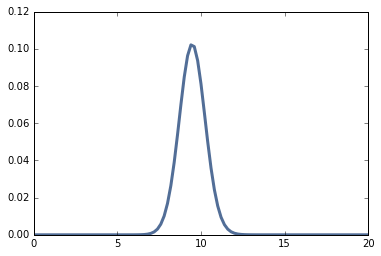

In [49]:
pmf_lamAll = suiteAll.Marginal(0)
thinkplot.Pdf(pmf_lamAll)

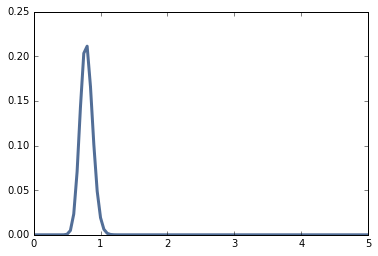

In [50]:
pmf_kAll = suiteAll.Marginal(1)
thinkplot.Pdf(pmf_kAll)

In [53]:
n = 100
#Assume a graduating class of 100
t_return = 24
#Look at the job rate at 24 months

In [54]:
metapmfAll = Pmf()
for (lam, k), prob in suiteAll.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmfAll[pmf] = prob

88

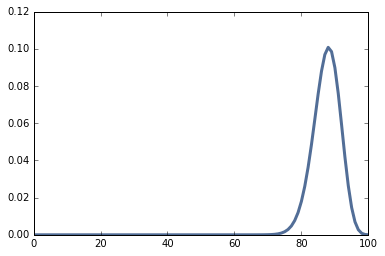

In [55]:
mixAll = MakeMixture(metapmfAll)
thinkplot.Pdf(mixAll)
mixAll.MAP()

In [56]:
prob = 0
for hypo in suiteAll:
    lam, k = hypo
    prob += suiteAll[hypo] * EvalWeibullCdf(9, lam, k)
print("Probability at 9 months", prob)

Probability at 9 months 0.61687263106


In [57]:
prob = 0
for hypo in suiteAll:
    lam, k = hypo
    prob += suiteAll[hypo] * EvalWeibullCdf(12, lam, k)
print("Probability at 12 months", prob)

Probability at 12 months 0.699969631769


In [58]:
prob = 0
for hypo in suiteAll:
    lam, k = hypo
    prob += suiteAll[hypo] * EvalWeibullCdf(24, lam, k)
print("Probability at 24 months", prob)

Probability at 24 months 0.874464424167


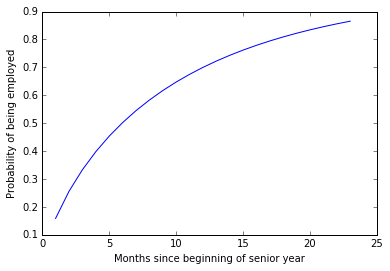

In [59]:
tot = []
for i in range(24):
    prob = 0
    for hypo in suiteAll:
        lam, k = hypo
        prob += suiteAll[hypo] * EvalWeibullCdf(i, lam, k)
    tot.append(prob)

        
plt.plot(tot)
plt.xlabel("Months since beginning of senior year")
plt.ylabel("Probability of being employed")